

:Data Preprocessing Using Python Sklearn ⚛




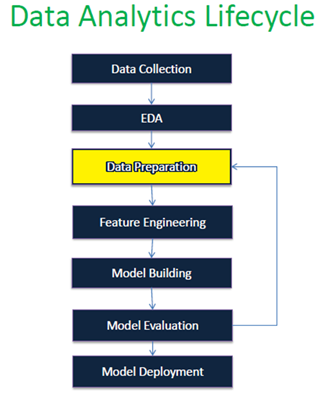
https://medium.com/@kesarimohan87/data-preprocessing-6c87d27156

# **1 DATA COLLECTION**

In [ ]:
import seaborn as sns
import pandas as pd
import os
print(sns.__version__)
titanic_train=pd.read_csv('/content/titanic_train.csv',sep=',',encoding="ISO-8859-1")
print(titanic_train.shape)
print(titanic_train.info())

0.11.1
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#titanic_train.columns.values
# diccionario con llaves {} para cambiar nombres de las variables
#cambio={'PassengerId':'id_pasajero',
#        'Survived':'sobrevive',
#        'Pclass':'clase_socioeco',
#        'Name':'Nombre',
#        'Sex':'sexo',
#        'Age':'edad',
#        'SibSp':'rel_fam',
#        'Parch':'rel_cerc',
#        'Ticket':'ticket',
#        'Fare':'tarifa',
#        'Cabin':'cabina',
#        'Embarked':'embarca'}
# Renombra las variables del dataframe "Empleados" utilizando el diccionario "cambio"
#implace true es para que se guarde de aqui en adelante y no solo cuando corra la linea
#titanic_train.rename(columns=cambio,inplace=True)
#titanic_train.head()

#2 ANALSIS EXPLORATORIO DE DATOS

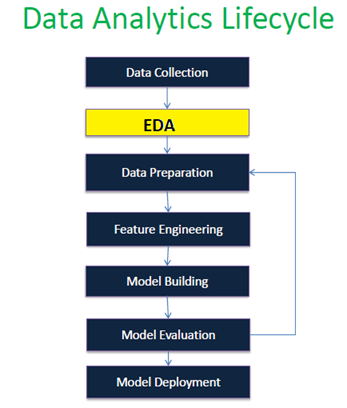

**El análisis de datos exploratorios se realiza principalmente mediante los siguientes métodos**

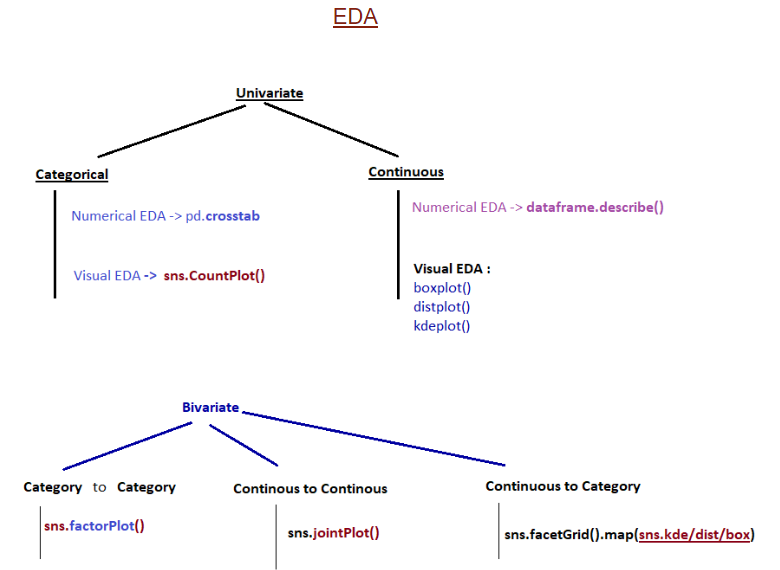

## **a) Univariate**

### Categorico

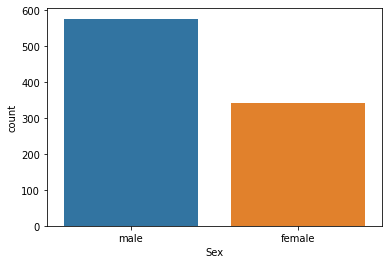

In [ ]:
import seaborn as sns
import pandas as pd
import os
titanic_train=pd.read_csv('/content/titanic_train.csv',sep=',',encoding="ISO-8859-1")
###############################  ANALISIS UNIVARIANTE  ###########################
#COLUMNAS CATEGORICAS: EDA
#-----------necesito un recuento de sobrevivientes frente a no sobrevivientes.
pd.crosstab(index=titanic_train["Survived"], columns="count")
# ----------- necesito un recuento de sobrevivientes frente a no  sobrevivientes por clase
pd.crosstab([titanic_train["Survived"],titanic_train["Pclass"]], columns="count")
## ----------- necesito un recuento de sobrevivientes frente a no  sobrevivientes por clase
pd.crosstab(index=titanic_train["Pclass"], columns="count")
pd.crosstab(index=titanic_train["Sex"],  columns="count")

#COLUMNAS CATEGORICAS:  visual EDA
#-----------Muestra el gráfico cuántos sobrevivieron y cuántos no sobrevivieron.
sns.countplot(x='Survived',data=titanic_train)
sns.countplot(x='Pclass',data=titanic_train)
sns.countplot(x='Sex',data=titanic_train)


### Continuo



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557

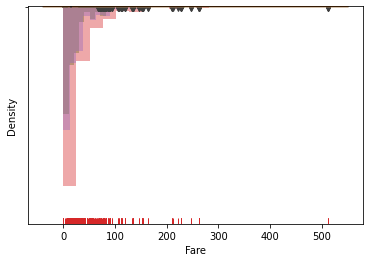

In [ ]:
# COLUMNAS CONTINUAS: numerical EDA
#-----------Todas las estadísticas básicas de columnas numéricas .
titanic_train['Fare'].describe()
#COLUMNAS CONTINUAS: visual EDA
#-----------gráfica de distribución para la columna de tarifa (continua)
sns.boxplot(x='Fare',data=titanic_train)
sns.distplot(titanic_train['Fare'])
#-----------diagrama de KDE para la columna de tarifa (continua)
sns.kdeplot(titanic_train['Fare'])
#-----------diagrama de caja para la columna de tarifa (continua)
sns.distplot(titanic_train['Fare'], kde=False)
sns.distplot(titanic_train['Fare'], bins=20, rug=True, kde=False)
sns.distplot(titanic_train['Fare'], bins=40, kde=False)

## **b) Bivariate**

#### categorico a categorico

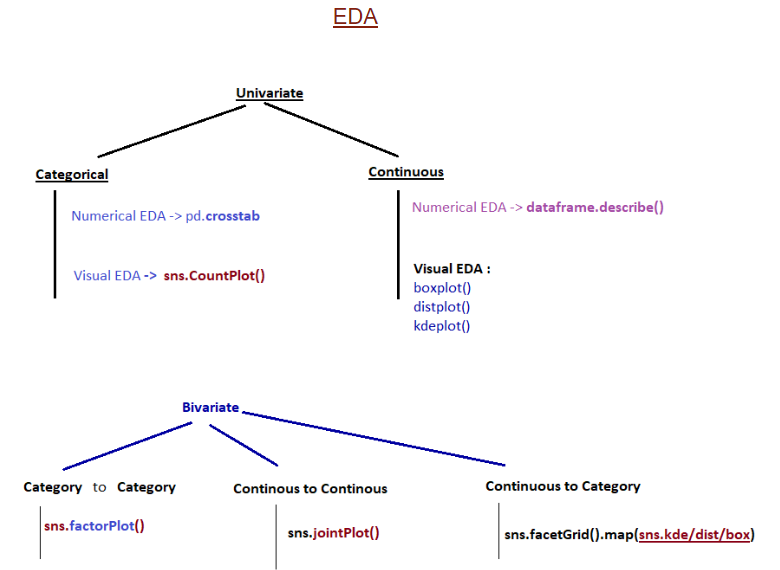

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update

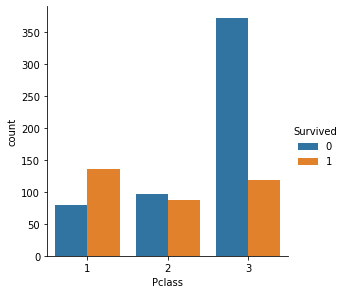

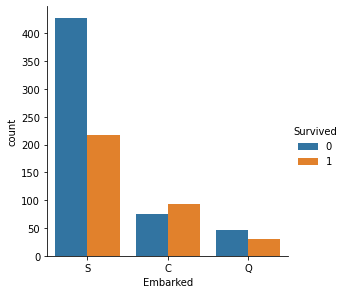

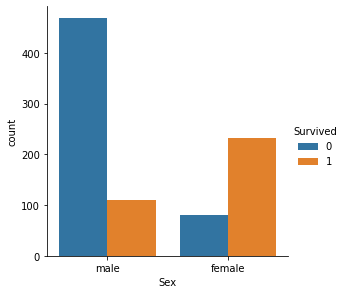

In [ ]:
###############################  Bivariate Analysis  ###########################
#explora relaciones bivariantes : categorical vs categorical
#-----------número de hombres y mujeres que sobrevivieron y no sobrevivieron en cada Pclass
sns.factorplot(x="Pclass", hue="Survived", data=titanic_train, kind="count", size=4)
#-----------para cada tipo de Embarcado, ¿cuántos sobrevivieron y no sobrevivieron?
sns.factorplot(x="Embarked", hue="Survived", data=titanic_train, kind="count", size=4)
sns.factorplot(x="Sex", hue="Survived", data=titanic_train, kind="count", size=4)


### continuo a categorico

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (

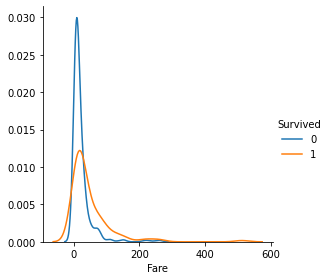

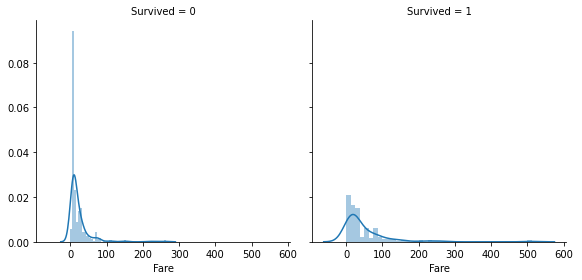

In [ ]:

#explora relaciones bivariantes: continuous  vs categorical
#-----------densidad basado en tarifa y tasa de supervivencia.
sns.FacetGrid(titanic_train, hue="Survived",size=4).map(sns.kdeplot, "Fare").add_legend()
#-----------Distplot basado en tarifa y tasa de supervivencia.
sns.FacetGrid(titanic_train, col="Survived",size=4).map(sns.distplot, "Fare").add_legend()


### continuo a continuo

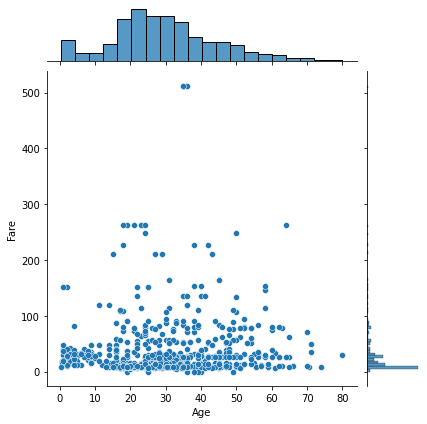

In [ ]:

#explora relaciones bivariantes: continuous vs continuous
#-----------¿cómo se relacionan la edad y la tarifa?
sns.jointplot(x="Age", y="Fare", data=titanic_train)# -*- coding: utf-8 -*-

##c) Multivariante

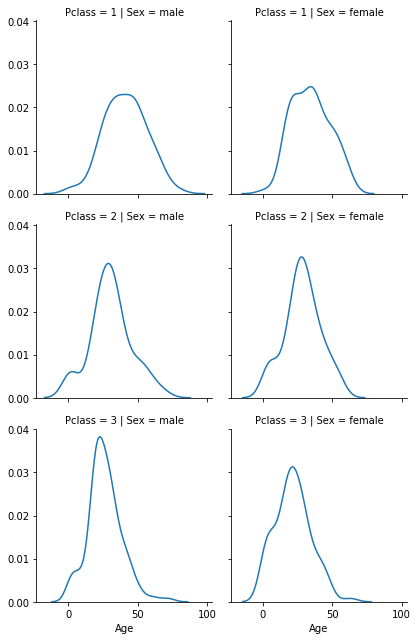

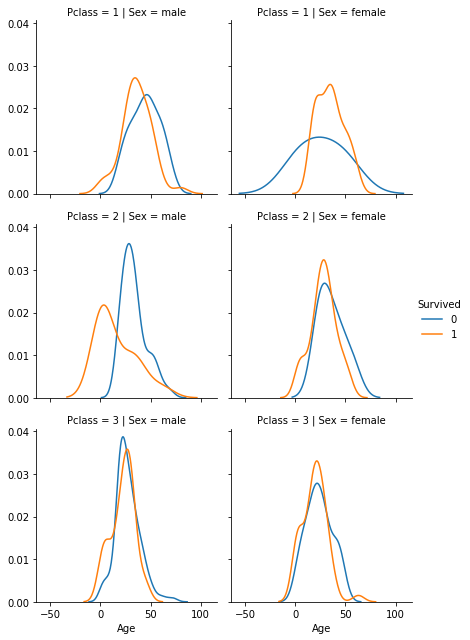

In [ ]:

###############################  Multivariate Analysis  ###########################
##Relación entre múltiples características.
# la edad teine impacto sobre la supervivencia para cada grupo de sexo?
g = sns.FacetGrid(titanic_train, row="Pclass", col="Sex" ).map(sns.kdeplot, "Age")

#la edad tiene impacto sobre la supervivencia para cada grupo pclass y sexo?
g = sns.FacetGrid(titanic_train, row="Pclass", col="Sex", hue="Survived").map(sns.kdeplot, "Age").add_legend()


### LIMPIEZA DE DATOS

In [ ]:
titanic_train.head(2)
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.00,Desconocido,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,Desconocido,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,370376,7.75,Desconocido,Q



> .describe()


1.   ount: cantidad de valores que contiene la columna.
2.   mean: valor promedio.
3.   std: desviación estandar.
4.   min: valor mínimo.
5.   25%: primer cuartil.
6.   50%: segundo cuartil.
7.   75%: tercer cuartil.
8.   max: valor máximo.
9.   dtype: tipo de valores que contiene la columna.

In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,888.000000,888.000000,888.000000,714.000000,888.000000
mean,445.540541,0.385135,2.306306,29.699118,32.255184
std,257.546302,0.486901,0.836515,14.526497,49.767873
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,222.750000,0.000000,2.000000,20.125000,7.917700
50%,444.500000,0.000000,3.000000,28.000000,14.454200
75%,668.250000,1.000000,3.000000,38.000000,31.068750
max,891.000000,1.000000,3.000000,80.000000,512.329200


.describe(include = 'all')


1.  unique: cantidad de valores únicos.
2.  top: valor único con más repeticiones.
3.  freq: cantidad de veces que aparece el valor más repetido.

In [ ]:
titanic_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
count,888.000000,888.000000,888.000000,888,888,714.000000,888,888.000000,888,886
unique,NaN,NaN,NaN,888,2,NaN,679,NaN,148,3
top,NaN,NaN,NaN,"Lines, Miss. Mary Conover",male,NaN,CA. 2343,NaN,Desconocido,S
freq,NaN,NaN,NaN,1,574,NaN,7,NaN,684,643
mean,445.540541,0.385135,2.306306,NaN,NaN,29.699118,NaN,32.255184,NaN,NaN
std,257.546302,0.486901,0.836515,NaN,NaN,14.526497,NaN,49.767873,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,NaN,0.000000,NaN,NaN
25%,222.750000,0.000000,2.000000,NaN,NaN,20.125000,NaN,7.917700,NaN,NaN
50%,444.500000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,NaN
75%,668.250000,1.000000,3.000000,NaN,NaN,38.000000,NaN,31.068750,NaN,NaN


# **3 PREPARACION DE LOS DATOS**

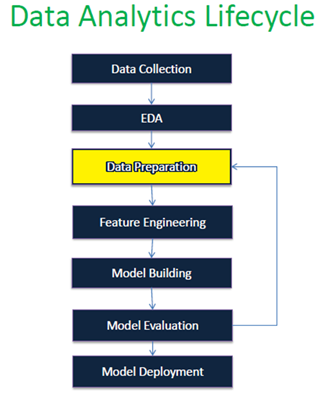

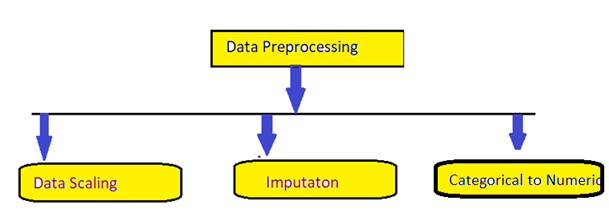

## **a) Escala de datos NORMALIZACION**

La mayoría de las veces, un conjunto de datos contendrá **características muy variables** en las magnitudes, unidades y rango.

**muchas veces las variables estan en distintas unidades de medicion**

*Pero dado que la mayoría de los algoritmos de aprendizaje automático utilizan la  **distancia euclidiana** entre dos puntos de datos en sus cálculos, esto es un problema.


Entonces, en este caso, deberíamos hacer que ambas **características estén en el mismo rango.** Para suprimir este efecto, debemos llevar todas las características al mismo nivel de magnitudes. Esto se puede lograr escalando.

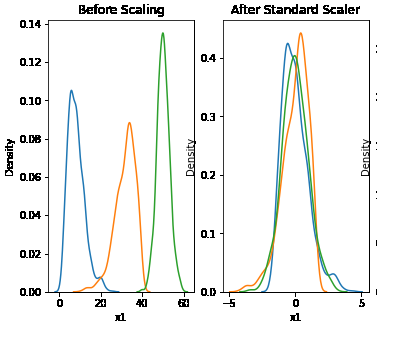

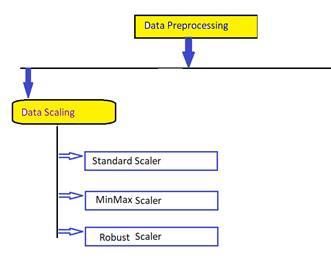

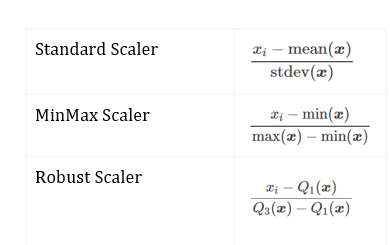

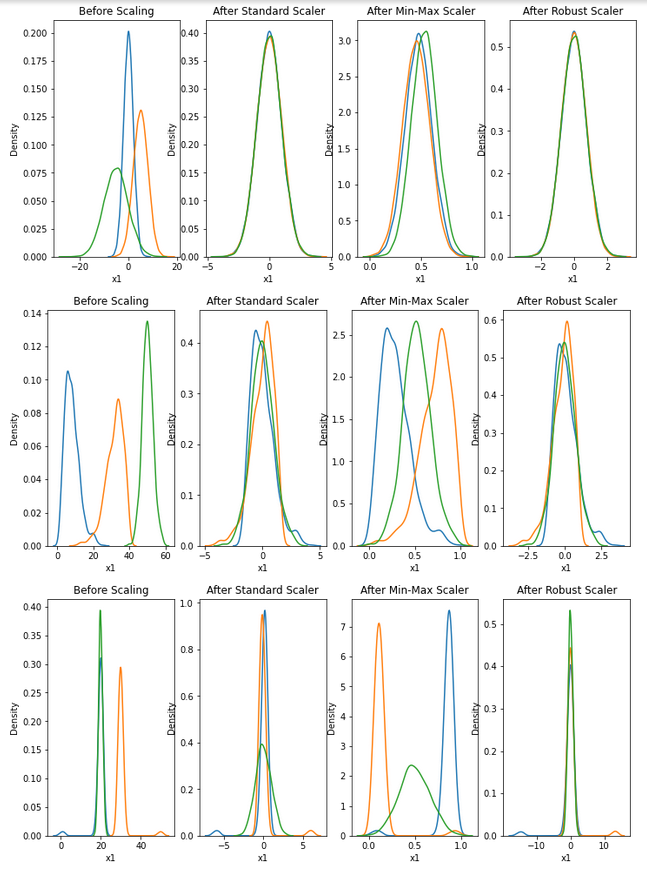

### **Escalador estándar:**

> asume que sus datos se distribuyen normalmente dentro de cada característica, y los escalará de manera que la distribución sea **la media y la desviación estándar**




In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    object  
 5   Age          714 non-null    int64   
 6   Ticket       714 non-null    object  
 7   Fare         714 non-null    float64 
 8   Cabin        714 non-null    category
 9   Embarked     714 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 57.9+ KB


In [ ]:
#FORMA MANUAL
varcuantis=['Pclass','Age']
(titanic_train[varcuantis]-titanic_train[varcuantis].mean())/titanic_train[varcuantis].std()
(titanic_train[varcuantis]-titanic_train[varcuantis].min())/(titanic_train[varcuantis].max()-titanic_train[varcuantis].min())


In [ ]:
#NO SON COMPARABLES ENTRE SI
#ANIOS CON CLASE SOCIAL
#para muchos procediemintos es necesario realizar medidas de asociacion de variables
#para realizar correlaciones requeiren ser estandarizadas
#hay dos formas para que nomralizar los atributos para que esten en una misma unidad
#de medicion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#CREA UNA INSTANCIA DE LA FUNCION DE ESCALAMIENTO ENTRE 0 A 1
SS=StandardScaler()
MM=MinMaxScaler()
#LISTA DE VARIABLES A NORMALIZAR
varcuantis=['Pclass','Age']
# Estandariza las variables cuantitativas con media 0 y desviacion estandar 1
SS.fit_transform(titanic_train[varcuantis])
MM.fit_transform(titanic_train[varcuantis])

# para guardar a un data frame
normalizadoSS=pd.DataFrame(SS.fit_transform(titanic_train[varcuantis]))

,Pclass,Age
0,1.0,0.2750
1,0.0,0.4750
2,1.0,0.3250
3,0.0,0.4375
4,1.0,0.4375
...,...,...
709,1.0,0.4875
710,0.5,0.3375
711,0.0,0.2375
712,0.0,0.3250


In [ ]:
normalizadoMM=pd.DataFrame(MM.fit_transform(titanic_train[varcuantis]))

,0,1
0,1.0,0.2750
1,0.0,0.4750
2,1.0,0.3250
3,0.0,0.4375
4,1.0,0.4375
...,...,...
709,1.0,0.4875
710,0.5,0.3375
711,0.0,0.2375
712,0.0,0.3250


### **MinMaxScaler:**
> reduce el rango de modo que ahora esté entre 0y 1(o -1hasta 1si existen valores negativos).


In [ ]:
minMaxScaler=preprocessing.MinMaxScaler()
minMaxScaler.fit(df1)
minMaxScaler.data_min_
minMaxScaler.data_max_
# transformando
minMaxDataframe=minMaxScaler.transform(df1)
minMaxDataframe

array([[1.        , 1.        ],
       [0.66666667, 0.75      ],
       [0.63333333, 0.5       ],
       [0.33333333, 0.25      ],
       [0.        , 0.        ]])

### **Escalador robusto:**

> usa el rango intercuartílico en lugar del mínimo-máximo, lo que lo hace robusto a valores atípicos.


In [ ]:
robustScaler=preprocessing.RobustScaler()
robustScaler.fit(df1)
robustScaler.center_
#transform
robustScaleDataFrame= robustScaler.transform(df1)
robustScaleDataFrame


array([[ 1.1,  1. ],
       [ 0.1,  0.5],
       [ 0. ,  0. ],
       [-0.9, -0.5],
       [-1.9, -1. ]])

## b) Imputacion de datos perdidos

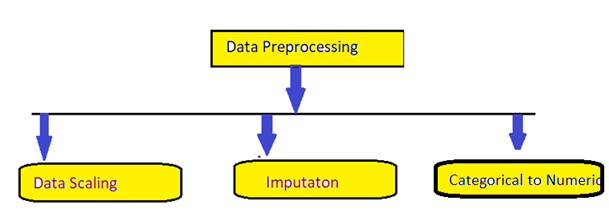

**Manejo de datos faltantes**
¿Qué falta valor?

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


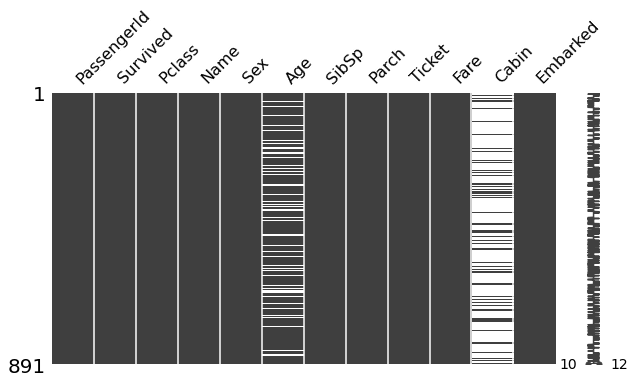

In [ ]:
print(titanic_train.shape)
print(titanic_train.info())

titanic_train.head(20)
titanic_train.describe()
titanic_train.isnull()
import missingno as mno
mno.matrix(titanic_train, figsize=(10,5))



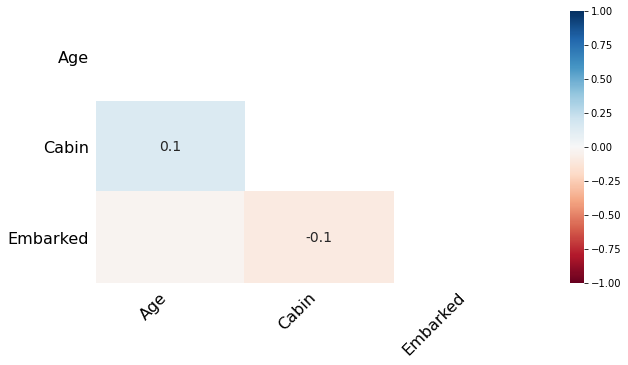

In [ ]:
#El missingnomapa de calor de correlación mide la
#correlación de nulidad: qué tan fuertemente la presencia
#o ausencia de una variable afecta la presencia de otra:
mno.heatmap(titanic_train, figsize=(10,5))

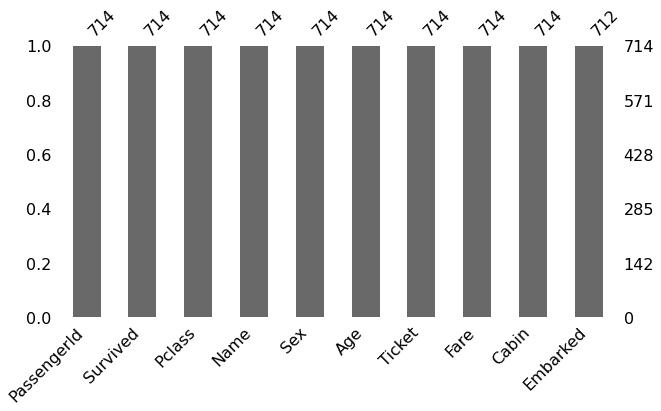

In [ ]:
#grafico de barras
mno.bar(titanic_train, figsize=(10,5))

In [ ]:
(titanic_train.isnull().sum(axis=1)/titanic_train.isnull().count(axis=1)).sort_values(ascending = False)

538    0.166667
330    0.166667
552    0.166667
154    0.166667
739    0.166667
         ...   
230    0.000000
671    0.000000
452    0.000000
679    0.000000
224    0.000000
Length: 888, dtype: float64

In [ ]:
# lista de empleados a eliminar
casosborrar=[451,768,524]
# Elimina los empleados con muchos datos perdidos
titanic_train=titanic_train.drop(casosborrar)
# lista de atributos a eliminar
varborrar=['SibSp','Parch']
# Elimina las variables con muchos datos perdidos, axis=1 es para eliminar por columnas
titanic_train=titanic_train.drop(varborrar,axis=1)
##################
################### Elimina las variables con muchos datos perdidos, axis=1 es para eliminar por columnas
################### Empleados=Empleados.drop(varborrar,axis=0)
##################
titanic_train.columns
titanic_train.shape

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **Tratar con los datos perdidos**

In [ ]:
#Reemplazando los valores perdidos por np.nan (not a number),
import numpy as np
###CRITERIO 1 : REQUIERO ELIMINAR LAS FILAS CON VALOR NAN DE LA COLUMNA EDAD DEBIDO A QUE LA EDAD CONTEMPLA UNA VARIABLE
###INDISPENSABLE PARA EL MODELO PREDICCION
#borra de la columna Edad (AXIS 0 ES FILAS)
titanic_train.dropna(subset=['Age'], axis = 0, inplace= True)
# Resetea 0 1 2 en orden correcto
titanic_train.reset_index(drop = True, inplace = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,Desconocido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,Desconocido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,Desconocido,S
...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,29.1250,Desconocido,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,Desconocido,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C


llenado de atributos por @desconocido@

In [ ]:
# lista de variables categóricas o cualitativas
varcategoricas=['Cabin']
# rellenar los datos perdidos de las variables cualitativas con "Desconocido"
## Empleados[varcategoricas].fillna('Desconocido') lo hace pero solo en memoria
titanic_train[varcategoricas]=titanic_train[varcategoricas].fillna('Desconocido')
titanic_train[varcategoricas]

,Cabin
0,Desconocido
1,C85
2,Desconocido
3,C123
4,Desconocido
...,...
886,Desconocido
887,B42
888,Desconocido
889,C148


### **FILL  datos string**

In [ ]:
titanic_train.describe(include=[np.object])

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,Desconocido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,Desconocido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,Desconocido,S
...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,382652,29.1250,Desconocido,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,Desconocido,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C148,C


In [ ]:
titanic_train['Embarked'].replace(np.nan, 'xxxx', inplace = True)

### **FILL  datos integer**

In [ ]:
average_column_name = titanic_train['Age'].astype(float).mean(axis = 0)
titanic_train['Age'].replace(np.nan, average_column_name, inplace = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,Desconocido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,Desconocido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,Desconocido,S
...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,382652,29.1250,Desconocido,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,Desconocido,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C148,C


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    object  
 5   Age          714 non-null    int64   
 6   Ticket       714 non-null    object  
 7   Fare         714 non-null    float64 
 8   Cabin        714 non-null    category
 9   Embarked     712 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 57.9+ KB


In [ ]:
#titanic_train = titanic_train.astype({"Sex":'category', "Age":'int64'})
titanic_train[varcategoricas]=titanic_train[varcategoricas].astype('category')
titanic_train['Age']=titanic_train['Age'].astype('int64')

## c)Transformacion de datos categoricas a numericas

In [ ]:
titanic_train.describe(include='all')
#crea  variables dicotomicas para sexo
pd.get_dummies(titanic_train.Sex)
#crea  variables dicotomicas para embarcacion
pd.get_dummies(titanic_train.Embarked)
# e incluye una dummy para los perdidos
pd.get_dummies(titanic_train.Sex,dummy_na=True)
varcategoricas_defindo=['Sex','Embarked']

pd.get_dummies(titanic_train[varcategoricas_defindo],prefix=['SX_','EC_'])
# Se utiliza en regresiones para descripciones (pero existe ya funciones que te realizan dicha tarea)

,SX__female,SX__male,EC__C,EC__Q,EC__S,EC__xxxx
0,0,1,0,0,1,0
1,1,0,1,0,0,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
709,1,0,0,1,0,0
710,0,1,0,0,1,0
711,1,0,0,0,1,0
712,0,1,1,0,0,0


# 4 INGENIERIA DE CARACTERISTICAS

# 5 CONSTRUCCION DEL MODELO

# 6 EVALUACION DEL MODELO

In [ ]:
import numpy as np
import pandas as pd
#Importamos el dataset para iniciar el análisis
iris = pd.read_csv('/content/Iris.csv',sep=',',encoding="ISO-8859-1")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print(iris.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Visualizamos los primeros 5 datos del dataset
print(iris.head())
#Como podemos observar el dataset cuenta 6 columnas,
#en donde están las características de ancho y longitud del sépalo
#y pétalo, a su vez el nombre de cada una de las especies.
#Pero adicionalmente a todo esto se encuentra una columna llamada ID que está demás,
#ya que una vez que los datos se convierten en pandas se crea automáticamente una
#columna con la numeración por lo que podemos eliminar la columna ID. Para esto utilizamos la instrucción drop.

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
#Eliminamos la primera columna ID
iris = iris.drop('Id',axis=1)
print(iris.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
#Análizamos los datos que tenemos disponibles
print('Información del dataset:')
print(iris.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
#Seguidamente utilizamos describe. En donde podemos observar los datos estadísticos del dataset.
print('Descripción del dataset:')
print(iris.describe())

Descripción del dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [ ]:
#Por último, verificamos la distribución de los datos de acuerdo a las especies de Iris,
#para ello utilizamos la instrucción groupby, especificando la columna Species y el tamaño de la misma.

In [ ]:
print('Distribución de las especies de Iris:')
print(iris.groupby('Species').size())

Distribución de las especies de Iris:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [ ]:
#Entendiendo todo esto veamos los datos de manera visual,
# para ello importamos la librería de matplotlib y procedamos a graficar el dataset.
import matplotlib.pyplot as plt

In [ ]:
#La gráfica a construir será del tipo dispersión,
# y vamos a graficar primero los datos correspondientes al sépalo.
# Colocamos en el eje X los datos de longitud y en el eje Y los datos del ancho,
#a su vez para cada una de las especies de Iris le colocamos un color.
#Para los datos del Iris setosa los colocamos de color azul,
#para el Iris Versicolor será de color verde
#y para el Iris Virginica colocamos los datos de color rojo.

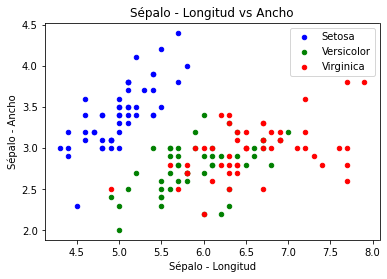

In [ ]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

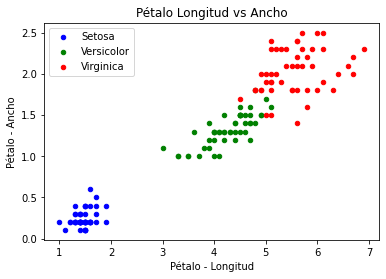

In [ ]:
#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

# Desarrollo del  clasificador utilizando los algoritmos de Machine Learning.

In [ ]:
#-Lo primero que debemos hacer es importar todas las librerías a utilizar,
# comenzando por train_test_split.
#Seguidamente por las librerías de los algoritmos,
#en este caso vamos a trabajar con
#Regresión Logística,
#Máquinas de Vectores de Soporte,
#Vecinos más Cercanos y
#Árboles de Decisión Clasificación.
#Recuerda que este es un ejercicio de clasificación por lo que todos los algoritmos a implementar deberán ser para este tipo de problemas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Existe la posibilidad de  construir varios modelos,
#### el primero de será con todos los datos del dataset,
####es decir para utilizar este modelo deberás tener la información del sépalo y el pétalo para poderlo utilizar.
# Pero adicionalmente podemos desarrollar otros dos modelos en donde utilicemos solamente los datos del sépalo
#y otro con el pétalo.
#Por lo que al final vamos a tener 3 modelos en total.
# Adicionalmente, para la construcción de nuestro modelo evaluaremos distintos algoritmos de Machine Learning
#para encontrar el más adecuado.
#Entonces comencemos a construir nuestro primer modelo con todos los datos,
# lo primero que debemos hacer es separar los datos con las características,
# que vendrían siendo todas menos la columna de especies,
#a estos datos los vamos a llamar “X” y los datos con las etiquetas
# o respuestas que sería la columna de especies vendrían siendo la variable “y”.
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['Species'], 1))
y = np.array(iris['Species'])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
#En este punto separamos los datos de entrenamiento y prueba utilizando la instrucción train_test_split.
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos para entrenamiento y 30 datos para prueba


In [ ]:
#Ahora si empecemos a aplicar los algoritmos de Machine Learning comenzando con Regresión Logística.
#Obviamente lo primero que debemos hacer es definir el algoritmo, LogisticRegression,
# seguidamente lo entrenamos utilizando la instrucción fit y realizamos la una predicción utilizando los datos de X_test.
# Para determinar la precisión o confianza del algoritmo utilizamos la instrucción score para calcularla.
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.9666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Con ella nos da un resultado de 0,975, lo cual no esta nada mal
# pero aún así vamos a verificar con otros algoritmos para ver si mejoramos este número.

# Procedemos a desarrollar un nuevo modelo ahora con el algoritmo de Máquinas de Vectores de Soporte,
# el procedimiento es exactamente igual, primero definimos el algoritmo, en este caso será SVC,
#lo entrenamos utilizando los datos de entrenamiento, realizamos una predicción y finalmente calculamos la precisión del mismo.
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.95


In [ ]:
# El resultado es de 0,991, un valor mucho mejor que el que obtuvimos con el anterior algoritmo.

In [ ]:
#Continuemos realizando las evaluaciones de los algoritmos y ahora vamos hacer el cálculo con
# el algoritmo de K vecinos más cercanos.
# El procedimiento es el mismo que hicimos con los otros algoritmos,
#solamente que acá tenemos que definir el número de vecinos que se evaluaran,
# entonces definimos el algoritmo KNeighborsClassifier y definimos el número de vecinos
#que sería para nosotros igual a 5, este número podemos cambiarlo y ver como cambia la precisión
# del algoritmo. Seguidamente entrenamos el algoritmo, realizamos una predicción y
#finalmente calculamos la precisión del algoritmo.
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.9583333333333334


In [ ]:
#Obtenemos como resultado 0,983, siendo muy parecido al obtenido con el primer algoritmo,
#por lo que hasta los momentos el modelo obtenido con el algoritmo de Máquinas de Soporte es el mejor.

#Evaluemos ahora el algoritmo de Árboles de Decisión Clasificación,
#definamos el algoritmo que sería DecisionTreeClassifier,
#seguidamente lo entrenamos y realizamos una predicción y seguidamente calculamos la precisión del mismo.

In [ ]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 1.0


In [ ]:
#Acá el resultado es igual a 1, es decir que se puede decir que este modelo es perfecto,
# por lo que sería el ideal para realizar las próximas predicciones.


In [ ]:
#Con esto tenemos un modelo creado con todo el conjunto de datos, ahora vamos a desarrollar
# y evaluar un nuevo modelo pero esta vez solamente con los datos correspondientes al sépalo,
#es decir que este modelo solamente evaluara estos datos más no los del pétalo.

#El procedimiento es muy parecido al anterior la diferencia son los datos que tomares para construir el modelo,
#entonces empecemos el desarrollo.

#Lo primero es definir los datos, como son exclusivamente los del sépalo debemos seleccionar estas columnas,
#que sería el de la longitud y ancho del sépalo y obviamente la columna correspondiente a la de especies.

In [ ]:
#Separo todos los datos con las características y las etiquetas o resultados
sepalo = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [ ]:
#Definido los datos ahora procedemos a separar las características con las etiquetas,
# a estos datos los vamos a llamar X_sepalo y Y_sepalo

In [ ]:
X_sepalo = np.array(sepalo.drop(['Species'], 1))
y_sepalo = np.array(sepalo['Species'])

In [ ]:
#Ahora procedemos a separar los datos de entrenamiento y prueba para proceder a construir los modelos.
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)
print('Son {} datos sépalo para entrenamiento y {} datos sépalo para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos sépalo para entrenamiento y 30 datos sépalo para prueba


In [ ]:
#Comencemos con el algoritmo de Regresión Logística, el procedimiento es exactamente igual que
# hicimos anteriormente, definimos el algoritmo, lo entrenamos,
#realizamos una predicción y calculamos la precisión del modelo.
# Ten la precaución acá que los datos que utilizamos deberán ser los correspondientes al sépalo únicamente.
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Regresión Logística - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Regresión Logística - Sépalo: 0.8416666666666667


In [ ]:
#La precisión de este modelo es de 0,75 lo que cual no es tan bueno, por lo que tenemos
#que evaluar otros algoritmos para verificar si podemos obtener algo mejor.

#Por lo tanto, ahora desarrollemos un modelo utilizando el algoritmo de Máquinas de Vectores de Soporte,
#igual que anteriormente, definimos el algoritmo, lo entrenamos, realizamos una predicción y finalmente
#calculamos la precisión.
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Máquinas de Vectores de Soporte - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))


Precisión Máquinas de Vectores de Soporte - Sépalo: 0.8416666666666667


In [ ]:
#El resultado obtenido es de 0,825, el cual mejoro comparándolo con el anterior algoritmo,
#aunque no es el mejor resultado.

#Evaluemos el algoritmo de K Vecinos más Cercanos,
# definimos el algoritmo en nuestro programa, entrenamos el modelo,
#realizamos una predicción y calculamos la precisión del modelo.
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Vecinos más Cercanos - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Vecinos más Cercanos - Sépalo: 0.875


In [ ]:
#La precisión de este algoritmo es de 0,825, muy parecido al anterior algoritmo,
# pero aún este resultado no es muy optimo.

#Por lo que evaluemos el último algoritmo que sería Árboles de Decisión Clasificación,
#igual que anteriormente y utilizando los datos correspondientes al sépalo, definimos el algoritmo,
#lo entrenamos, realizamos una predicción y calculamos la precisión.
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Árboles de Decisión Clasificación - Sépalo: 0.9583333333333334


In [ ]:
#El resultado es de 0,941, siendo este el mejor de los resultados por lo que este es el mejor modelo de todos.

In [ ]:
#Ahora desarrollemos el último de los modelos que vamos hacer en este proyecto,
# para este vamos a utilizar los datos correspondientes al pétalo,
# tanto longitud como ancho y por supuesto la columna de especies que sería la etiqueta.

In [ ]:
#En conclusión, se construyeron varios modelos con tres conjuntos de datos,
# siendo el modelo construido con el algoritmo de Árbol de Decisión Clasificación el
#que obtuvo los mejores resultados en cuanto a la precisión.

In [ ]:
########## LIBRERÍAS A UTILIZAR ##########
import numpy as np
import pandas as pd
########## IMPORTAMOS LOS DATOS ##########
#Importamos el dataset para iniciar el análisis
iris = pd.read_csv('/content/Iris.csv',sep=',',encoding="ISO-8859-1")
#Visualizamos los primeros 5 datos del dataset
#print(iris.head())
#Eliminamos la primera columna ID
iris = iris.drop('Id',axis=1)
#print(iris.head())
########## ANALIZAMOS LOS DATOS ##########
#Análizamos los datos que tenemos disponibles
print('Información del dataset:')
print(iris.info())
print('Descripción del dataset:')
print(iris.describe())
print('Distribución de las especies de Iris:')
print(iris.groupby('Species').size())
########## VISUALIZAMOS LOS DATOS ##########
import matplotlib.pyplot as plt
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',
          x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()
#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',
          x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',
    x='PetalLengthCm', y='PetalWidthCm', color='green',
    label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',
    x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()
########## APLICACIÓN DE ALGORITMOS DE MACHINE LEARNING ##########
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
##################################################################
########## MODELO CON TODOS LOS DATOS
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['Species'], 1))
y = np.array(iris['Species'])
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))
##################################################################
########## MODELO CON DATOS DE SÉPALO
#Separo todos los datos con las características y las etiquetas o resultados
sepalo = iris[['SepalLengthCm','SepalWidthCm','Species']]
X_sepalo = np.array(sepalo.drop(['Species'], 1))
y_sepalo = np.array(sepalo['Species'])
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)
print('Son {} datos sépalo para entrenamiento y {} datos sépalo para prueba'.format(X_train.shape[0], X_test.shape[0]))
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Regresión Logística - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Máquinas de Vectores de Soporte - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Vecinos más Cercanos - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))
print()
print()
##################################################################
########## MODELO CON DATOS DE PÉTALO
#Separo todos los datos con las características y las etiquetas o resultados
petalo = iris[['PetalLengthCm','PetalWidthCm','Species']]
X_petalo = np.array(petalo.drop(['Species'], 1))
y_petalo = np.array(petalo['Species'])
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petalo, y_petalo, test_size=0.2)
print('Son {} datos pétalo para entrenamiento y {} datos pétalo para prueba'.format(X_train.shape[0], X_test.shape[0]))
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Regresión Logística - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Máquinas de Vectores de Soporte - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Vecinos más Cercanos - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Árboles de Decisión Clasificación - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))
#"""
#Clasificar las plantas Iris
#@author: ligdigonzalez
#https://aprendeia.com/machine-learning-clasificador-flor-iris-python/
#"""